In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("shared/data/momiq.csv")
df.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


Explanatory Variable (X): Mom IQ score

Response Variable (Y): Child test score

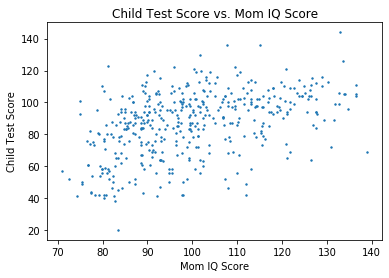

In [14]:
plt.scatter(df['mom_iq'], df['kid_score'], s=2)
plt.title('Child Test Score vs. Mom IQ Score')
plt.xlabel('Mom IQ Score')
plt.ylabel('Child Test Score')
plt.show()

In [15]:
print(f"Mom IQ Score and Child Test Score Correlation: {round(df['mom_iq'].corr(df['kid_score']), 4)}")
# Will plot the x and y means and std for clarity in future problems
print(f"Child Score Mean: {round(df['kid_score'].mean(), 4)}")
print(f"Mom IQ Score Mean: {round(df['mom_iq'].mean(), 4)}")
print(f"Child Score Standard Deviation: {round(df['kid_score'].std(), 4)}")
print(f"Mom IQ Score Standard Deviation: {round(df['mom_iq'].std(), 4)}")

Mom IQ Score and Child Test Score Correlation: 0.4483
Child Score Mean: 86.7972
Mom IQ Score Mean: 100.0
Child Score Standard Deviation: 20.4107
Mom IQ Score Standard Deviation: 15.0


I selected  Mom IQ as the explanatory variable and child test scores as the response variable. I assigned the variables in this way because it is more intuitive to think of different Mom IQ's dictating change in child test scores, as opposed to different child test scores dictating Mom IQ's. It is not implausible to think that higher mom IQ's could signify certain genetic cognitive advantages that can be passed on to children, as well as certain learning/study habits that the mother could pass on to the child. Based on the data, the correlation between Mom IQ score and child test score is .4483, which means that there is a positive correlation which is not too strong or weak. 

In [16]:
def standardize(col):
    """
    Standardize the input column by converting values to z-scores.
    This function subtracts the mean from each value in the series and then divides the result by the standard deviation of the series. 
    """
    # Get z-scores of each value
    z_scores = (col - col.mean()) / col.std()
    return z_scores

In [17]:
#Standardize mom_iq values and assign to new column
df['Standardized_mom_iq'] = standardize(df['mom_iq'])
#Standardize kid_score values and assign to new column
df['Standardized_kid_score'] = standardize(df['kid_score'])
df.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age,Standardized_mom_iq,Standardized_kid_score
0,65,1,121.117529,4,27,1.407835,-1.067932
1,98,1,89.361882,4,25,-0.709208,0.548868
2,85,1,115.443165,4,27,1.029544,-0.088054
3,83,1,99.449639,3,25,-0.036691,-0.186041
4,115,1,92.745710,4,27,-0.483619,1.381765


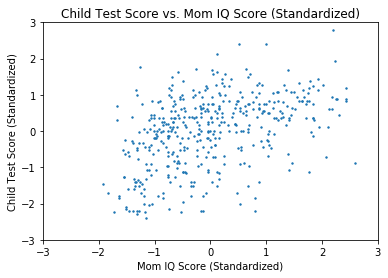

In [18]:
plt.scatter(df['Standardized_mom_iq'], df['Standardized_kid_score'], s=2)
plt.title('Child Test Score vs. Mom IQ Score (Standardized)')
plt.xlabel('Mom IQ Score (Standardized)')
plt.ylabel('Child Test Score (Standardized)')
# Set the x- and y-axis limits to the interval [−3, 3].
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [19]:
print(f"Mom IQ Score and Child Test Score Correlation (Standardized): {round(df['Standardized_mom_iq'].corr(df['Standardized_kid_score']), 4)}")
# Use new mean and standard deviation calculations to comment on similarities and differences of previous scatter to standardized scatter
print(f"Child Score Mean (Standardized): {round(df['Standardized_kid_score'].mean(), 4)}")
print(f"Mom IQ Score Mean (Standardized): {round(df['Standardized_mom_iq'].mean(), 4)}")
print(f"Child Score Standard Deviation (Standardized): {round(df['Standardized_kid_score'].std(), 4)}")
print(f"Mom IQ Score Standard Deviation (Standardized): {round(df['Standardized_mom_iq'].std(), 4)}")

Mom IQ Score and Child Test Score Correlation (Standardized): 0.4483
Child Score Mean (Standardized): -0.0
Mom IQ Score Mean (Standardized): -0.0
Child Score Standard Deviation (Standardized): 1.0
Mom IQ Score Standard Deviation (Standardized): 1.0


Notice that after standardizing both columns and plotting, the graph looks almost identical barring the intervals on the x and y axes. The correlation is the exact same (0.4483) as the previous scatter plot, but now the mean of the x-values and y-values is 0 (rounding to the nearest 4th decimal place). The standard deviation for the x-values and y-values after standardizing is 1. In the previous scatter plot, the child score mean was 86.79, while the mom IQ score mean was 100.0 rounded to the nearest 4th decimal. The child score standard deviation was 20.41 and the mom IQ score standard deviation was 15.0. 

In [20]:
import statsmodels.formula.api as smf

mod = smf.ols(formula='Standardized_kid_score ~ Standardized_mom_iq', data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Standardized_kid_score   R-squared:                       0.201
Model:                                OLS   Adj. R-squared:                  0.199
Method:                     Least Squares   F-statistic:                     108.6
Date:                    Tue, 05 Nov 2024   Prob (F-statistic):           7.66e-23
Time:                            13:23:55   Log-Likelihood:                -566.64
No. Observations:                     434   AIC:                             1137.
Df Residuals:                         432   BIC:                             1145.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.695e-16      0.043  -6.27e-15      1.000      -0.084       0.084
Standardized_mom_iq     0.4483      0.043     10.423      0.000       0.364       0.533
==============================================================================
Omnibus:                        7.545   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.735
Skew:                          -0.324   Prob(JB):                       0.0209
Kurtosis:                       2.919   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**NOTICE**: The slope of the regression line when the x and y variables are standardized is the same as the correlation coefficient between x and y (.4483).

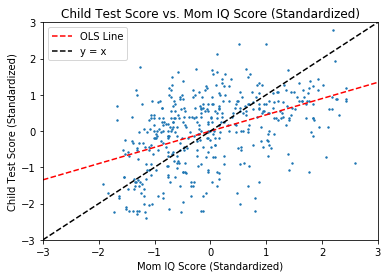

In [21]:
plt.scatter(df['Standardized_mom_iq'], df['Standardized_kid_score'], s=2)
plt.title('Child Test Score vs. Mom IQ Score (Standardized)')
plt.xlabel('Mom IQ Score (Standardized)')
plt.ylabel('Child Test Score (Standardized)')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
#Perfect, already wrote code to plot different OLS in part 1h

x_range = np.linspace(-3, 3)
y_predicted = mod.predict(pd.DataFrame({'Standardized_mom_iq': x_range}))
plt.plot(x_range, y_predicted, label='OLS Line', linestyle='--', color='red')

#Code for the y = x line in black

plt.plot([-3, 3], [-3, 3], label='y = x', linestyle='--', color='black')

plt.legend()
plt.show()

In [22]:
#Here I will calculate the RMSE for the OLS regression and y = x to help answer part (g)
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

# Use previous model of OLS prediction
y_predicted = mod.predict(df[['Standardized_mom_iq']])
# Use x values for y 'predictions' in y = x
predictions_y_equals_x = df['Standardized_mom_iq']

# Using actual child test score values
actual_y = df['Standardized_kid_score'].values

# Calculate RMSE for OLS with sklearn library import
mse = mean_squared_error(actual_y, y_predicted)
rmse = sqrt(mse)

# Calculate RMSE for y = x with sklearn library import
mse_y_equals_x = mean_squared_error(actual_y, predictions_y_equals_x)
rmse_y_equals_x = sqrt(mse_y_equals_x)

print("Root Mean Square Error for OLS:", round(rmse, 4))
print("Root Mean Square Error for y = x:", round(rmse_y_equals_x, 4))

Root Mean Square Error for OLS: 0.8929
Root Mean Square Error for y = x: 1.0492


**Notice**: that since the OLS regression line has a smaller RMSE, we can say it fits the data better. This was also my expectation visually, as the data points seem to concentrate closer to the OLS regression that the y = x line. 